**Максим, привет!**

Меня зовут Артемьева Саша, я буду проверять твой проект. Приятно познакомиться, хоть и заочно:)
    
Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [150]:
import pandas as pd  #для дальнейшей работы импортируем всё необходимое и выполним некоторые присвоения в первой ячейке
import seaborn as sb
from nltk.stem import SnowballStemmer
russian_stemmer = SnowballStemmer('russian')
from pymystem3 import Mystem
m = Mystem() 
from collections import Counter

data = pd.read_csv('/datasets/data.csv')
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Первичное ознакомление показало, что таблица "data" содержит 12 стобцов и 21525 строк.
Количество значений в стобцах рознится, следовательно перед работой с данными, нужно изучить имеющиеся пропуски и устранить их. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Увидели, с чем предстоит иметь дело

## Шаг 2. Предобработка данных

### Обработка пропусков

In [152]:
print(data[data['days_employed'].isna() == True ]['total_income'].unique())
# говорит о том, что если в days_employed Nan, тогда total_income тоже Nan.

data['days_employed'] = data['days_employed'].fillna(0) # заполним пропуски нулями
data['total_income'] = data['total_income'].fillna(0) # заполним пропуски нулями
#data.info() # удостоверимся, что в каждом столбце одинаковое количество значений


[nan]


In [153]:
print('количество строк с отрицательным значением детей:',(data.loc[data.loc[:,'children'] == -1 ]['debt']).count())
perc_negative_ch = (data.loc[data.loc[:,'children'] == -1 ]['debt']).count() / data['children'].count()
print("Процентное отношение строк с отрицательный значением детей: {:.1%}".format(perc_negative_ch))


количество строк с отрицательным значением детей: 47
Процентное отношение строк с отрицательный значением детей: 0.2%


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Молодец, что нашел долю аномалий, прежде чем удалять их!

In [154]:
data = data.loc[data['children'] != -1]
# процент строк, где количество детей -1 менее 0,5%, потому влияние этих строк на общий вывод незначительно и они будут удалены из общего датафрэйма.

**Вывод**

- Было показано, что если в days_employed Nan, тогда total_income тоже Nan. При этом в days_employed нет нулевых значений. Была выдвинута гипотеза, что значение Nan в столбце days_employed стоит рассматривать как отсутствие опыта работы и для дальнейшего решения все пропуски в этих столбцах будут заполнены значением 0.

- Было показано, что процент строк с отрицательным значением в столбце "дети" менее одного процента, поэтому, не установив причину появления таких значений, не установив закономерностей с другими столбцами и значений, которыми их можно заменить, строки с отрицательным значением в столбце "дети" были удалены.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Можно сообщить о проблеме заказчику и запросить метаданные для анализа

### Замена типа данных

In [155]:
data['days_employed']=data['days_employed'].astype('int') # приводим значения в столбце 'days_employed' к типу int
data['total_income']=data['total_income'].astype('int') # приводим значения в столбце 'total_income' к типу int
data['education']=data['education'].str.lower() # приводим значения в столбце 'education' к нижнему регистру


Количество клиентов с возрастом "0":  101
Процентное отношение строк с нулевым значением возраста: 0.5%
Количество строк с отницательным значением дохода 0

Рассмотрим значения в столбце "children"
0     14149
1      4818
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64
Количетсво клиентов с отрицательным значением количества дней стажа 15869
Процентное отношение клиентов с отрицательным значением количества дней стажа: 73.9%


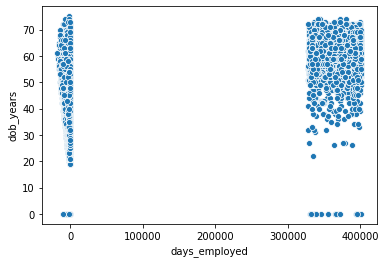

In [156]:
#display(data['income_type'].value_counts()) # изучим специальности
# Проверим, у какого количества клиентов возраст: 0 и как можно заполнить этот пропуск
print('Количество клиентов с возрастом "0": ', data.loc[data.loc[:,'dob_years'] == 0 ]['debt'].count())
#print(data.loc[data.loc[:,'dob_years'] == 0 ]['total_income'].value_counts(bins=4)) # у части доход отрицательный, но у большинства положительный
#print(data.loc[data.loc[:,'dob_years'] == 0 ]['days_employed'].value_counts(bins=4)) # количество дней и положительно и отрицательно
#print(data.loc[data.loc[:,'dob_years'] == 0 ]['education'].value_counts()) # разное образование
#print(data.loc[data.loc[:,'dob_years'] == 0 ]['family_status_id'].value_counts()) # разный семейный статус
#print(data.loc[data.loc[:,'dob_years'] == 0 ]['purpose'].value_counts()) # разные цели кредитов
#print(data.loc[data.loc[:,'dob_years'] == 0 ]['children'].value_counts()) # разное количество детей
perc_age_0 = data.loc[data.loc[:,'dob_years'] == 0 ]['debt'].count() / data['debt'].count()
print("Процентное отношение строк с нулевым значением возраста: {:.1%}".format(perc_age_0))

#display(data.loc[data.loc[:,'days_employed'] == 0 ]['dob_years'].count()) #.value_counts(bins=4))# возраст тех, у кого отрицательный стаж. они есть во всех возрастных категориях
# тех, у кого стаж отрицательный - 15 906
# тех, у кого стаж положительный - 3 445
# тех, у кого стаж 0 - 2 120

print('Количество строк с отницательным значением дохода', data.loc[data.loc[:,'total_income'] < 0 ]['dob_years'].count())
print()
print('Рассмотрим значения в столбце "children"')
print(data['children'].value_counts())


sb.scatterplot(x = data['days_employed'], y= data['dob_years'] )

print('Количетсво клиентов с отрицательным значением количества дней стажа', data.loc[data.loc[:,'days_employed'] < 0 ]['days_employed'].count())
print("Процентное отношение клиентов с отрицательным значением количества дней стажа: {:.1%}".format(data.loc[data.loc[:,'days_employed'] < 0 ]['days_employed'].count()/ data['days_employed'].count()))

**Вывод**

В документации к заданию, было сказано, что

days_employed - трудовой стаж в днях

total_income - доход в месяц

Удобно работать с данными из этих столбцов как с целыми числами. 
Для библиотеки Pandas стандартный метод превращения значений в числовой тип to_numeric(). Однако, данный метод превращает значения в числовой тип float64 (вещественное число). Что не выполняет поставленную задачу. 

Потому в данном разделе значения были переведены в тип int методом astype().

Отдельного была проведена проверка на наличие отрицательных значений в столбце "total_income". Все значения в данном столбце неотрицательны, что позволяет говорить о корректности заполнения данного столбца.

Также в этом разделе были выведены значение столбца "children" с подсчётом количества значений. Хотя подобное распределение вызывает некоторые сомнения, возможность проверить истинность имеющихся данных отсутствовала, поэтому, данные примем за истинные и не требующие корректировки.

Далее были изучены значения в столбцах "days_employed" и "dob_years". Очевидно, что значения в этих столбцах аномальные. Однако, попытки установить закономерности с целью устранения аномалии были безуспешны. 

Учитывая, что для ответов на вопрросы исследования данные столбцы не играют роли, было принято решение не менять значения, а перейти к следующему шагу исследования.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Мы нашли аномалию в -1 ребенок. Что можно сказать по поводу 20 детей? Что можно сказать еще об аномальных значениях? Они могут скрываться в любой колонке датафрейма, поэтому важно изучить каждый столбец </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 
Мои исправления к данному разделу расположились под твоим комментарием.
</div>

In [157]:
print(data['income_type'].value_counts())
# аномалий не обнаружено
print(data['gender'].value_counts())
xna_pers = data.loc[data.loc[:,'gender'] == 'XNA' ]

print('Процент клиентов с значением "XNA" в столбце "пол": {:.3%}'.format(xna_pers['gender'].count()/ data['gender'].count()))

сотрудник          11093
компаньон           5076
пенсионер           3848
госслужащий         1455
предприниматель        2
безработный            2
в декрете              1
студент                1
Name: income_type, dtype: int64
F      14201
M       7276
XNA        1
Name: gender, dtype: int64
Процент клиентов с значением "XNA" в столбце "пол": 0.005%


**Дополнение к выводу:**

Было обнаружено, что в столбце пол, существует одно неопределённое значение. На ход исследовния это не влияет, потому это значение было оставлено без изменений.

Не сложно увидеть, что все отрицательные значения в столбце со стажем могут быть количеством дней, но с отрицательным знаком, поэтому в у этих значений достаточно поменять знак, но у всех положительных значений в этом столбце значения не могут соответствовать количеству дней, поэтому к с ними нужно провести отдельный анализ.
В рамках основново исследования была построена диаграмма рассеивания. В рамках этой диаграммы можно установить, что все положительные значения столбца 'days_employed' находятся в промежутке от 300 000 до 400 000. В документации к исследованию было сказано, что в данном столбце стаж указывается в днях, однако, 300 000 дней это 822 год. Если предположить, что 300 000 это не дни, а часы, мы получим 34 года, что могло бы соответствовать стажу клиента, однако на диаграмме видно, что в таблице присутствуют клиенты с возрастом меньше 30 лет, в чьей колонке стажа число, превыщающее 300 000, что вызывает противоречие вышеописанной гипотезе. Последняя гипотеза, что 300 000 - это секунды, но это менее одного года. 

Отдельно нужно отметить, что процент строк с отрицательным значением стажа выше 20 и удаление этих строк, очевидно, негативно скажется на репрезентативности выборки.

Исходя из вышеописанного, мы сделаем вывод, что в данных ошибка, которую невозможно устранить имеющимися методами и, не имея возможности получить доступ к метаданным, необходимо оставить значения в имеющемся виде. Понимая при этом, что если значение отрицательно, тогда это количество дней стажа. Если значение положительно- данные о стаже утеряны.


<div class="alert alert-info"> <b>Комментарий студента:
</b> В твоём комментарии сказано: Что можно сказать по поводу 20 детей? У меня в выводе есть следующее:

       Также в этом разделе были выведены значение столбца "children" с подсчётом количества значений. Хотя подобное распределение вызывает некоторые сомнения, возможность проверить истинность имеющихся данных отсутствовала, поэтому, данные примем за истинные и не требующие корректировки.
    
Я согласен, что это значение требует отдельного внимания. Но что делать, если я не могу запросить метаданные, не могу ни у кого ничего уточнить? Хотя 20 детей это маловероятное значение, но такие семьи есть. У меня на этот случай даже есть поисковики, которые всегда дадут миллион ссылок, доказывающих правоту любого утверждения. Например эта: https://babyzzz.ru/news/43882.html 
Получается, что семьи в 20 детей существуют. Но 20 - выпадает из нормального распределения количетсва детей. И я обращаю на это внимание, но без доказательств, что такого быть не может всё, что я могу сделать выдвинуть гопотезу. Моя гипотеза: При создании таблицы была создана категория: "20", в которую попали все клиенты с количеством детей 6+. Я уверен, удалять эти строки нельзя, хотя их количество менее 0,5% от общего числа строк, однако в категории 4+ детей это около 60%. Очевидно, что удаление подобных данных из рассчёта приведёт к искажению итогового вывода. Изменение данных тоже невозможно, т.к. нет зацепок, позволяющих сказать что привело к такому искажению.

P.S. Я понял, что ты хотела чтобы я это внёс в вывод с самого начала. В следующий раз я буду вносить все мысли по поводу и стараться их максимально обосновывать. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Спасибо за подробные пояснения! Теперь я четко понимаю тови мысли и ход действий. Молодец, что прибегаешь к сторонним источикам для подтверждения выводов

<div class="alert alert-info" role="alert">
<b>⁉️Вопрос студента:
</b> В связи со всем вышеописанным у меня возник вопрос. Как грамотнее оформлять работу.

В ходе работы над проектом я провожу много различных проверок. Но очевидно, что если я буду оставлять весь код, который мне помогал в ходе исследования, работа получится грамоздкой и трудночитаемой.
В этом проекте я удалял почти всё, оставляя лишь небольшую часть, предварительно закомментировав. 
Нужно ли это оставлять чтобы показать объём проделанной работы? (Не то, что я молодец, а что эти аспекты проекта я рассмотрел и отмёл как незначимые для целей исследования) А если нужно оставлять, нужно ли выводить через print чтобы с результатами работы кода можно было ознакомиться?
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Безусловно, все проверки мы вместить не сможем, иначе это может раздуть работу. К тому, же, если это вариант работы для заказчика, скорее всего, бОльшая часть проверок ему не интересна, ему нужен конкретный результат. Поэтому, я бы советовала оставлять только те проверки, которые действительно поясняют какие-то спорные моменты. Обязательно делай вывод результатов - либо в виде компактного датафрейма, либо простейшей визуализации. Код понятен только тебе, заказчику нужны цифры и картинки. 
    
И как раз по кейсу выше - ты четко написал, почему ты оставил 20 детей, вопросов не осталось. Поэтому я советую добавлять такие описания, которые подтверждают твои действия и не оставляют сомнения в правильности

### Обработка дубликатов

In [158]:
print('Был обнаружен', data.duplicated().sum(), 'дубликат')

data = data.drop_duplicates().reset_index(drop = True) 

Был обнаружен 71 дубликат


**Вывод**

В ходе предобработки данных, были выявлены и удалены дубликаты.

В pandas существует специальный метод duplicated(). Но он возвращает Series со значением True для строк-дубликатов, что не удовлетворяет поставленным целям, всязи с чем, был выбран метод drop_duplicates(). Он позволяет удалить дубликаты. Однако, далее может возникнуть ошибка, из-за пропуска некоторых индексов. Чтобы перезаписать порядок индексов, используем команду: reset_index(drop = True).


Отдельного внимания заслуживают причины появления дубликатов. Работа, по выявлению аномальных значений, проделанная выше показывает, что изначальные данные требовали детальной проработки. Отметим различное заполнение столбца "education", где образование может быть записано с разным регистром, что явно указывает на человеческий фактор. Следует предположить, что и другие неточности можно считать следствием человеческого фактора.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Удалять дубли можно только после полной обработки данных. Верно! </div>


### Лемматизация

In [159]:
lemma = []
for one_purpose in data['purpose'].unique():
    lemmas = m.lemmatize(one_purpose)
    lemma.extend(lemmas)


print(Counter(lemma)) 


Counter({' ': 59, '\n': 38, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'подержать': 1, 'со': 1, 'подержанный': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1})


**Вывод**

В данном разделе была произведена лемматизация значений в столбце "purpose" средствами библиотеки nltk.

Через обращение к каждому значению в стоблце 'purpose', предварительно применив функцию unique(), позволив тем самым сэкономить вычислительные ресурсы, мы получаем набор лемм, который присоединяем к заранее подготовленному списку методом .extend() во избежание появления списка списков (как это будет при использовании .append())

Затем значения из списка лемм было выведено с подсчётом количества повторений для выявления наиболее популярных целей.


Изучение полученного списка лем позволяет выделить 4 уникальных категории. В целях формализации и создания более универсального кода, была добавлена ещё одна категория: другое.

По итогу проделанной работы были выделены следующие категории:
- недвижимость
- автомобиль
- образование
- свадьба
- другое


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Нужные категории найдены </div>

### Категоризация данных

In [160]:
def give_category (row):
    purpose = row['purpose']
    if 'недвижим' in purpose:
        return 'недвижимость'
    elif 'жиль' in purpose:
        return 'недвижимость'
    elif 'свадьб' in purpose:
        return 'свадьба'
    elif 'авто' in purpose:
        return 'автомобиль'
    elif 'образов' in purpose:
        return 'образование'
    else:
        return 'другое'

data['purpose_category'] = data.apply(give_category, axis=1)

def income_category (row):
    purpose = row['total_income']
    if purpose < 79159:
        return 'Категория 1. Низкий уровень дохода'
    elif purpose < 158318:
        return 'Категория 2 Уровень ниже среднего'
    elif purpose < 237477:
        return 'Категория 3 Средний уровень дохода'
    elif purpose < 316636:
        return 'Категория 4 Высокий уровень дохода'
    else:
        return 'Категория 5 Сверх высокий уровень дохода'
    
data['total_income_category'] = data.apply(income_category, axis =1)

def children_category (row):
    purpose = row['children']
    if purpose < 1:
        return 'без детей'
    elif purpose < 2:
        return '1 ребёнок'
    elif purpose < 4:
        return '2-3 ребёнка'
    
    else:
        return 'больше 3х детей'
    
data['children_category'] = data.apply(children_category, axis =1)

print(data.loc[data.loc[:,'purpose_category'] == 'другое' ]['dob_years'].value_counts())
# Отметим, что в категорию "другое" ничего не попадает.

data.head()


Series([], Name: dob_years, dtype: int64)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category,children_category
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,Категория 4 Высокий уровень дохода,1 ребёнок
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,Категория 2 Уровень ниже среднего,1 ребёнок
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,Категория 2 Уровень ниже среднего,без детей
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,Категория 4 Высокий уровень дохода,2-3 ребёнка
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,Категория 3 Средний уровень дохода,без детей


**Вывод**

Была проделана работа по категоризации данных по столбцам "children", "total_income" и "purpose".

Для этого были созданы столбцы "purpose_category", "total_income_category" и "children_category", в которых записывается одна из выделенных категорий функцией apply.

По итогам лемматизации столбца "purpose" были выделены 5 основных тем, однако, в ходе присвоения категории каждому из значений, выяснилось, что последняя категория "другое", оказалась невостребованной. 


Также подробное изучение доходов клиентов, позволило выделить 5 категорий по уровню дохода. От низкого до сверх-высокого. 

Отметим, что клиентам была дана категория и по количеству детей. 0, 1, 2-3 и больше трёх.

Значение каждой из категорий записано в соответствующий столбец таблицы.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Категоризации - разделение данных на более понятные категории, как ты сделал с леммами. Доход можно было бы разделить на низкий, средний и высокий. А детей на категории "1 ребенок", "2-3 ребенка", "больше 3х детей". Все это поможет ответить нам на вопросы ниже и найти скрытые закономерности. Давай поработаем с категоризацией!

<div class="alert alert-info"> <b>Комментарий студента:
</b> После твоего комментария я добавил ещё две функции, которые присваивают категорию по количеству детей и по доходу в соответсвие с теми категориями, которые я использую далее в исследовании. Это было отражено в новых выводах к этому разделу.

Я понял, что со следующего раза буду создавать подобные категории в самом начале, а не в проработке гипотез, однако, в этой исследовании я отказался от этой затеи Т.к. у тебя тобой отмечено, что там всё верно. При этом времени, начался новый спринт и есть большая потребность тратить имеющее время на актуальную задачу. Надеюсь ты согласишься с этими доводами.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Соглашусь:) Категоризация корректна

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?


In [161]:
data_debt = data.loc[data.loc[:,'debt'] == 1 ] # выделим в отдельный датафрэйм все строки, где долг == 1
total_clients = data['debt'].count() # найдём общее количество клиентов
sum_debt = data_debt['debt'].count() / total_clients
print('Процент клиентов с задолженностью : {:.2%}'.format(sum_debt))

data_0_children = data_debt.loc[data_debt.loc[:,'children'] == 0 ]['debt'].count() # найдём количество клиентов, у которых нет детей 
data_1_children = data_debt.loc[data_debt.loc[:,'children'] == 1 ]['debt'].count() # найдём количество клиентов с 1 ребёнком
data_not_0_children = data_debt.loc[data_debt.loc[:,'children'] != 0 ]['debt'].count() # найдём количество клиентов, у которых несколько детей

perc_dept_no_children = data_0_children / total_clients
print("Процентное отношение должников без детей от общего числа клиентов: {:.2%}".format(perc_dept_no_children))


perc_dept_children = data_not_0_children / total_clients
print("Процентное отношение должников с детьми от общего числа клиентов: {:.2%}".format(perc_dept_children))

print()
perc_debt_no_children = data_0_children / data_debt['debt'].count()
print("Процентное отношение должников без детей от числа клиентов с задолженностью: {:.1%}".format(perc_debt_no_children))

perc_dept_children = data_not_0_children / data_debt['debt'].count()
print("Процентное отношение должников с детьми от числа клиентов с задолженностью: {:.1%}".format(perc_dept_children))

print()

perc_debt_1_children = data_1_children / data_debt['debt'].count()
print("Процентное отношение должников c одним ребёнком от числа клиентов с задолженностью: {:.1%}".format(perc_debt_1_children))

perc_debt_2plus_children = perc_dept_children - perc_debt_1_children 
print("Процентное отношение должников c более чем одним ребёнком от числа клиентов с задолженностью: {:.1%}".format(perc_debt_2plus_children))

print()

data_larg_fam = data.loc[data.loc[:,'children'] > 1 ]['debt'].count()
perc_debt_2plus_children = (data_not_0_children - data_1_children) / data_larg_fam
print("Процентное отношение должников c более чем одним ребёнком от общего числа клиентов с более чем одним ребёнком: {:.1%}".format(perc_debt_2plus_children))

data_1_ch_fam = data.loc[data.loc[:,'children'] == 1 ]['debt'].count()
perc_debt_1_children = data_1_children / data_1_ch_fam
print("Процентное отношение должников c одним ребёнком от общего числа клиентов с одним ребёнком: {:.1%}".format(perc_debt_1_children))


data_0_ch_fam = data.loc[data.loc[:,'children'] == 0 ]['debt'].count()
perc_debt_0_children = data_0_children / data_0_ch_fam
print("Процентное отношение должников без детей от общего числа клиентов без детей: {:.1%}".format(perc_debt_0_children))

Процент клиентов с задолженностью : 8.13%
Процентное отношение должников без детей от общего числа клиентов: 4.97%
Процентное отношение должников с детьми от общего числа клиентов: 3.16%

Процентное отношение должников без детей от числа клиентов с задолженностью: 61.1%
Процентное отношение должников с детьми от числа клиентов с задолженностью: 38.9%

Процентное отношение должников c одним ребёнком от числа клиентов с задолженностью: 25.5%
Процентное отношение должников c более чем одним ребёнком от числа клиентов с задолженностью: 13.4%

Процентное отношение должников c более чем одним ребёнком от общего числа клиентов с более чем одним ребёнком: 9.3%
Процентное отношение должников c одним ребёнком от общего числа клиентов с одним ребёнком: 9.2%
Процентное отношение должников без детей от общего числа клиентов без детей: 7.5%


**Вывод**

Для проверки гипотезы, о существовании взаимосвязи между фактом наличия детей и наличием задолженности, были преведены различные численные значения. Однако, особое внимание стоит обратить на последние три полученных значения. Из них можно сделать вывод, что вероятность появления задолженности у клиентов без детей ниже, чем у клиентов с детьми.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Верно

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [162]:
data_family_status_debt = data.loc[data.loc[:,'debt'] == 1 ]['family_status_id'].value_counts()
data_family_status_no_debt = data.loc[data.loc[:,'debt'] == 0 ]['family_status_id'].value_counts()

family_status = {'женат / замужем':[data_family_status_no_debt[0], data_family_status_debt[0]], 'гражданский брак':[data_family_status_no_debt[1], data_family_status_debt[1]], 'вдовец / вдова':[data_family_status_no_debt[2], data_family_status_debt[2]], 'в разводе':[data_family_status_no_debt[3], data_family_status_debt[3]], 'Не женат / не замужем':[data_family_status_no_debt[4], data_family_status_debt[4]]}

df = pd.DataFrame(family_status, index = ['no debt' , 'debt'])
cols = df.columns

display(df)

for i in range(5):
    print("Процент, имеющих долг в категории", cols[i] ,": {:.1%}".format(data_family_status_debt[i]/ (data_family_status_no_debt[i] + data_family_status_debt[i])))


,женат / замужем,гражданский брак,вдовец / вдова,в разводе,Не женат / не замужем
no debt,11380,3758,892,1106,2531
debt,930,388,63,85,274


Процент, имеющих долг в категории женат / замужем : 7.6%
Процент, имеющих долг в категории гражданский брак : 9.4%
Процент, имеющих долг в категории вдовец / вдова : 6.6%
Процент, имеющих долг в категории в разводе : 7.1%
Процент, имеющих долг в категории Не женат / не замужем : 9.8%


**Вывод**

Исходя из полученных данных, можно сделать вывод, что взаимосвязь между семейным положением и возвратом кредита в срок имеется, однако она не ярко выражена.


- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [163]:
df_debt_0_income = data.loc[data.loc[:,'debt'] == 0 ]['total_income'].reset_index(drop = True) # доход клиентов без долгов
df_debt_1_income = data.loc[data.loc[:,'debt'] == 1 ]['total_income'].reset_index(drop = True) # доход клиентов с долгами

#step = int((data['total_income'].max() - data['total_income'].min())/ 5) # разделим все доходы на 4 равные (по разбросу) категории
# данный метод деления не дал репрезентативных результатов.

df_2 = data['total_income'].sort_values(ascending=True).reset_index(drop = True) # разделим массив на 5 равных категорий
part_clients = df_2[int(len(data['total_income'])*0.2)]

first_0 = 0
first_1 = 0
first_2 = 0
first_3 = 0
first_4 = 0
second_0 = 0
second_1 = 0
second_2 = 0
second_3 = 0
second_4 = 0


for i in range(len(df_debt_0_income)):
    if df_debt_0_income[i] < part_clients:
        first_0+= 1
    elif (df_debt_0_income[i] < part_clients*2):
        first_1+= 1
    elif (df_debt_0_income[i] < part_clients*3):
        first_2+= 1
    elif (df_debt_0_income[i] < part_clients*4):
        first_3+= 1
    else:
        first_4+= 1

for i in range(len(df_debt_1_income)):
    if df_debt_1_income[i] < part_clients:
        second_0+= 1
    elif (df_debt_1_income[i] < part_clients*2):
        second_1+= 1
    elif (df_debt_1_income[i] < part_clients*3):
        second_2+= 1
    elif (df_debt_1_income[i] < part_clients*3):
        second_3+= 1
    else:
        second_4+= 1

data_M = {'debt == 0': [first_0, first_1, first_2, first_3, first_4], 'debt == 1': [second_0, second_1, second_2, second_3, second_4]} 

df01 = pd.DataFrame(data_M, index = ['категория 1', 'категория 2','категория 3','категория 4','категория 5'])

for i in range(4):
    print('Категория', i+1, ' - это клиенты с доходом [', i * part_clients, ';', (i+1)*part_clients, ')' )
print('Категория', 4+1, ' - это клиенты с доходом [', 4 * part_clients, ';', data['total_income'].max(), ' )' )

display(df01)

print("Процент клиентов с задолженностью в категории 1: {:.1%}".format(second_0 / (first_0 + second_0)))
print("Процент клиентов с задолженностью в категории 2: {:.1%}".format(second_1 / (first_1+ second_1)))
print("Процент клиентов с задолженностью в категории 3: {:.1%}".format(second_2 / (first_2+ second_2)))
print("Процент клиентов с задолженностью в категории 4: {:.1%}".format(second_3 / (first_3+ second_3)))
print("Процент клиентов с задолженностью в категории 5: {:.1%}".format(second_4 / (first_4+ second_4)))



Категория 1  - это клиенты с доходом [ 0 ; 79159 )
Категория 2  - это клиенты с доходом [ 79159 ; 158318 )
Категория 3  - это клиенты с доходом [ 158318 ; 237477 )
Категория 4  - это клиенты с доходом [ 237477 ; 316636 )
Категория 5  - это клиенты с доходом [ 316636 ; 2265604  )


,debt == 0,debt == 1
категория 1,3948,333
категория 2,7993,756
категория 3,4735,425
категория 4,1815,0
категория 5,1176,226


Процент клиентов с задолженностью в категории 1: 7.8%
Процент клиентов с задолженностью в категории 2: 8.6%
Процент клиентов с задолженностью в категории 3: 8.2%
Процент клиентов с задолженностью в категории 4: 0.0%
Процент клиентов с задолженностью в категории 5: 16.1%


**Вывод**

Исходя из полученных данных, можно сделать вывод, что клиенты, с сверх-высоким доходом, имеют задолженность более чем в два раза чаще, чем те клиенты, чей доход меньше большинтсва. При этом, существует категория клиентов с высоким доходом, в которой процент клиентов с задолженностью получился равным нулю.

- Как разные цели кредита влияют на его возврат в срок?

In [164]:
data_debt_purpose = data.groupby('purpose_category')['debt'].value_counts()

df_value_counts = pd.DataFrame(data_debt_purpose)
df_value_counts.columns = ['debt_count']
display(df_value_counts)
#df_value_counts.info()
df_value_counts.index
#print(df_value_counts.loc[('автомобиль', 1),'debt_count'])

print('Процент клиентов с задолженностью, с целью кредита "автомобиль" {:.1%}'.format(df_value_counts.loc[('автомобиль', 1),'debt_count'] / (df_value_counts.loc[('автомобиль', 1),'debt_count']+ df_value_counts.loc[('автомобиль', 0),'debt_count'])))
print('Процент клиентов с задолженностью, с целью кредита "недвижимость" {:.1%}'.format(df_value_counts.loc[('недвижимость', 1),'debt_count'] / (df_value_counts.loc[('недвижимость', 1),'debt_count']+ df_value_counts.loc[('недвижимость', 0),'debt_count'])))
print('Процент клиентов с задолженностью, с целью кредита "образование" {:.1%}'.format(df_value_counts.loc[('образование', 1),'debt_count'] / (df_value_counts.loc[('образование', 1),'debt_count']+ df_value_counts.loc[('образование', 0),'debt_count'])))
print('Процент клиентов с задолженностью, с целью кредита "свадьба" {:.1%}'.format(df_value_counts.loc[('свадьба', 1),'debt_count'] / (df_value_counts.loc[('свадьба', 1),'debt_count']+ df_value_counts.loc[('свадьба', 0),'debt_count'])))


debt_count
purpose_category debt            
автомобиль       0           3893
                 1            402
недвижимость     0          10005
                 1            782
образование      0           3633
                 1            370
свадьба          0           2136
                 1            186

Процент клиентов с задолженностью, с целью кредита "автомобиль" 9.4%
Процент клиентов с задолженностью, с целью кредита "недвижимость" 7.2%
Процент клиентов с задолженностью, с целью кредита "образование" 9.2%
Процент клиентов с задолженностью, с целью кредита "свадьба" 8.0%


**Вывод**

Поиск взаимосвязей показал наличие слабой зависимости, между целью кредита и наличием задолженности. Наибольший процент клиентов с задолженностью в качестве целей получения кредита указали "автомобиль" или "образование", наименьший процент клиентов с задолженностю в категории "недвижимость".

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Все так

## Шаг 4. Общий вывод

<div class="alert alert-info"> <b>Комментарий студента:</b> Старый вариант вывода</div>

В ходе данного исследования были проверены следующие гипотезы:
- Существует взаимосвязь между наличием детей и наличием задолженности.
- Существует взаимосвязт между семейным положением и наличием задолженности.
- Существует взаимосвязь между уровнем дохода и наличием задолженности.
- Существует взаимосвязь между целью получения кредита и наличием задолженности.


Исходя из полученных данных можно утверждать, что каждая из этих гипотез подтвердилась частично.

Было установлено, что вероятность появления задолженности у клиента со статусом: вдовец / вдова, без детей, берущий кредит на жильё и имеющий не высокий доход ниже, чем у клиента со статусом не женат / не замужем, с более чем одним ребёнком, берущий кредит на автомобиль и имеющий сверх-высокий доход.

<div class="alert alert-info"> <b>Комментарий студента:</b> Новый вариант вывода</div>


Представленный анализ был проведён на основе данных, полученных из таблицы data.csv. Данная таблица содержит 21525 строк и 12 столбцов с такими данными, как:
children - количество детей в семье         
days_employed - трудовой стаж в днях
dob_years - возраст клиента в годах
education - образование клиента
education_id - идентификатор образования
family_status - семейное положение
family_status_id - идетнификатор семейного положения
gender - пол клиента
income_type - тип занятости
debt - имел ли задолженность по возврату кредитов
total_income - доход в месяц
purpose - цель получения кредита

Первичный анализ таблицы показал, что количетсво не нулевых значений в столбцах отличается. В столбце "количество детей" существуют не только положительные, но и отрицательные значения, а так же есть некоторая "аномалия" в распределении коилчества детей. В столбце "days_employed" значения могут быть не только положительные, но и отрицательные или Nan. В документации к таблице указано, что трудовой стаж указан в днях. Однако, значения столбце существуют значения, превыщающие среднюю продолджительность жизни человека в несколько раз. В столбце "dob_years" существуют значения равные нулю. В столбце "education" названия категорий написаны в разном регистре. В столбце "gender" более двух категорий. В столбце "total_income" существуют значения Nan. Столбец "purpose" требует категоризации значений.

На начальном этапе обработки данных было отмечено, что если в days_employed Nan, тогда total_income тоже Nan. Была выдвинута гипотеза, что значение Nan в столбце days_employed стоит рассматривать как отсутствие опыта работы и для дальнейшего решения все пропуски в этих столбцах были заполнены значением 0.

Было показано, что процент строк с отрицательным значением в столбце "дети" менее одного процента, поэтому, не установив причину появления таких значений, не установив закономерностей с другими столбцами и значений, которыми их можно заменить, строки с отрицательным значением в столбце "дети" были удалены.

Было обнаружено, что в столбце пол, существует одно неопределённое значение. На результат исследовния это не могло повлиять, потому это значение было оставлено без изменений.

Далее были изучены значения в столбцах "days_employed" и "dob_years". Очевидно, что значения в этих столбцах аномальные. Однако, попытки установить закономерности с целью устранения аномалии были безуспешны. Не имею возможности скорректировать данные, они были удалены из исследования.

Затем таблица была проверена на наличие дубликатов. В данной таблице был обнаружен 71 дубликат, Для корректной работы все дубликаты были удалены из таблицы.

Была проделана работа по категоризации данных по столбцам "children", "total_income" и "purpose".

Для этого были созданы столбцы "purpose_category", "total_income_category" и "children_category", в которых записывается одна из выделенных категорий.

Дале были проверены 4 гипотезы исследования, а именно:
- Существует взаимосвязь между наличием детей и наличием задолженности.
- Существует взаимосвязт между семейным положением и наличием задолженности.
- Существует взаимосвязь между уровнем дохода и наличием задолженности.
- Существует взаимосвязь между целью получения кредита и наличием задолженности.


Для проверки гипотезы, о существовании взаимосвязи между фактом наличия детей и наличием задолженности, были рассчитаны процентные отношения должников c более чем одним ребёнком от общего числа клиентов с более чем одним ребёнком (9.3%), процентное отношение должников c одним ребёнком от общего числа клиентов с одним ребёнком (9.2%) и Процентное отношение должников без детей от общего числа клиентов без детей (7.5%). Из полученных данных можно сделать вывод, что вероятность появления задолженности у клиентов без детей ниже, чем у клиентов с детьми.

Для проверки гипотезы о наличии взаимосвязи между семейным положением и наличием задолженности был рассчитан процент клиентов с задолженностью в каждой из категорий и было получено, что хотя и существует некоторая закономерность между семейным положением и наличием долга, однако, она не ярко выражена.

Для проверки гипотезы о взаимосвязи уровня доходов и наличия задолженности, было получено, что клиенты, с сверх-высоким доходом, имеют задолженность более чем в два раза чаще, чем те клиенты, низким доходом. При этом, существует категория клиентов с высоким доходом, в которой процент клиентов с задолженностью равен нулю.

Для проверки гипотезы о наличии взаимосвязи между целью получения кредита и наличием задолженности был рассчитан процент клиентов с задолжненностью в каждой из категорий. Наибольший процент клиентов с задолженностью в качестве целей получения кредита указали "автомобиль" или "образование", наименьший процент клиентов с задолженностю в категории "недвижимость".

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Вывод - это полный отчет о проделанной работе. Он должен содержать все: от обработки данных до рекомендаций заказчику. Давай расширим его!</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Полноценный вывод о качественно проделанной работе. Заказчик будет доволен!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.

Спасибо за ваш труд. Надеюсь волосы на голове рвать не будете. Вложил много сил в эту работу и теперь с трепетом в сердце отправляю её к Вам.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Спасибо за работу! Проект получился очень хорошим. Давай сделаем его сильнее:
        
- поработаем с аномалиями, найдем их, посчитаем их долю и поймем, что с ними делать
- доработаем категоризацию
- расширим вывод

Оставила направляющие комментарии. Возвращаю тебе работу, чтобы ты смог задать вопросы. Буду ждать твою работу на финальное ревью!
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

    
Спасибо за твои комментарии, жаль, что не получилось сделать это на прошлой неделе, пока в памяти были свежи воспоминания того, как и что делается.
Но я постарался всё вспомнить и добросовестно отработать все твои замечания в меру моего понимая того, как должен выглядеть финальный результат.

    
Очень надеюсь, что моё понимание того, что и как я должен был отработать, совпадает с твоим.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Спасибо за проработку комментариев! Тебе удалось вспомнить все и теперь все отлично:) Если у тебя возникнут вопросы, смело задавай мне их через куратора. Удачи на следующих этапах!